# **KSP 5.0 Selection Assignment**





In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Section 1: Calculating the Redshift of Galaxies

You are given the data for all the galaxies in the cluster in the file 'galaxy.csv'.

This includes the name of the galaxy, observed wavelength of the $H\alpha$ line $\lambda_{H\alpha}$, Right Ascension at J2000.0 and Declination and J2000.0 (You can read more about RA and Dec [here](https://en.wikipedia.org/wiki/Equatorial_coordinate_system))

In [62]:
galaxy_data = pd.read_csv('galaxy.csv')


Since the galaxies would have some radial velocities with respect to us, the wavelengths we observed would be [redshifted](https://en.wikipedia.org/wiki/Redshift) due to doppler effect.

Using the value of the Observed Wavelength of $H\alpha$ line (Rest Wavelength $\lambda_{H\alpha0} = 6562.8nm)$, calculate the redshift of the galaxies in our cluster.

Use this to find their radial velocities of the galaxies and plot it.

(Assume that the observed wavelength has been correscted for the motion of earth around sun, and motion of sun around the center of Milky Way. Put more simply, these are the wavelengths you would have observed if you were at rest at the center of Milky Way)

In [7]:
galaxy_data

,Name,Observed Wavelength of H-alpha,Apparent Mag,RA J2000.0,Dec J2000.0
0,PGC1664006,6581.251999,12.465970,11 32 06.6,+22 07 31
1,PGC1620526,6602.969899,13.975112,11 35 54.4,+20 13 20
2,PGC1597887,6588.264616,13.767743,11 39 08.9,+19 35 00
3,UGC06670,6592.589623,12.932077,11 42 29.4,+18 19 59
4,PGC1519757,6591.906247,11.195245,11 44 40.7,+16 53 59
...,...,...,...,...,...
1532,UGC08276,6557.188672,13.251336,13 12 06.6,+05 28 33
1533,UGC08285,6570.434472,14.428350,13 12 33.3,+07 11 03
1534,UGC08298,6587.586814,14.588527,13 13 19.7,+10 11 39
1535,SDSSJ131347.30+100311.1,6571.536697,14.910544,13 13 47.3,+10 03 11


In [63]:
Rest_Wavelength_H_alpha = 6562.8
c = 299792.458 # km/sec
galaxy_data['Redshift(z)'] = (galaxy_data['Observed Wavelength of H-alpha'] - Rest_Wavelength_H_alpha)/Rest_Wavelength_H_alpha

galaxy_data['Velocity(km/sec)'] = galaxy_data['Redshift(z)']*c
#print(galaxy_data['redshift'])
#print(galaxy_data['Velocity'])

Using the data from galaxy.csv, answer the following questions.

For your convenience, the RA and Dec data has been converted from the format $a^\circ b^m c^s$ to $xx^\circ$ below


In [64]:
temp = galaxy_data['RA J2000.0'].str.split(' ', expand=True)
galaxy_data['RA J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600
temp = galaxy_data['Dec J2000.0'].str.split(' ', expand=True)
galaxy_data['Dec J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600

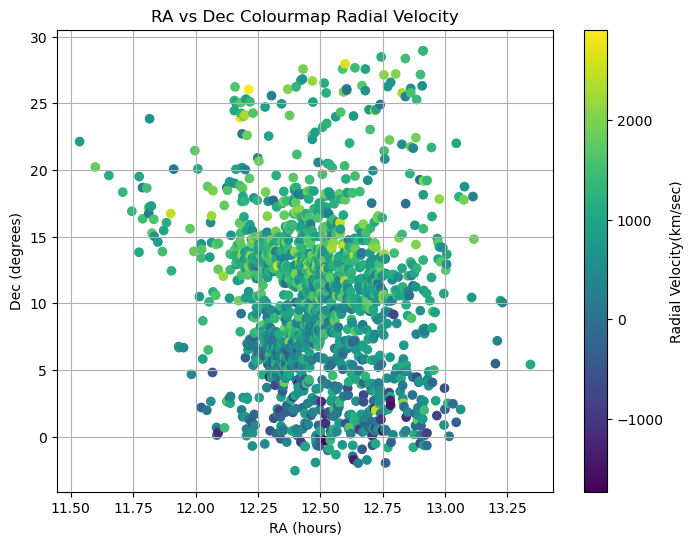

In [73]:

ra = galaxy_data['RA J2000.0']
dec = galaxy_data['Dec J2000.0']
velocity = galaxy_data['Velocity(km/sec)']

cmap = 'viridis'
plt.figure(figsize=(8, 6))
plt.scatter(ra, dec, c=velocity, cmap=cmap, marker='o')
plt.xlabel('RA (hours)')
plt.ylabel('Dec (degrees)')
plt.title('RA vs Dec Colourmap Radial Velocity')
plt.colorbar(label='Radial Velocity(km/sec)')
plt.grid(True)
plt.show()

***

###Q1.1. What is the approximate angular size of the galaxy cluster?

The given data indicates that the galaxy cluster is (11.5 to 13.25)hr ra aand (-4 to 29) degree in dec 


***

###Q1.2. Can you comment anything about the rotation of the galaxies around the center of the cluster.
HINT: You may find it useful to plot a scatter plot of RA and DEC with radial velocity as colormap.

   The galaxy cluster is rotating with its outer orbit galaxys rotating with 2000 km/s (section 5  clearifys it)

***

In [5]:
# your code here

#Section 2: Calibrating Cepheids Data

NOTE: Although there are no prerequisities for this section, it relies a bit on knowledge about cepheids and their Period-Luminosity Relation. Necessary resource links have been provided wherever needed. You are strongly encouraged to use the internet to aid as a reference whenever needed.
***

The [Gaia Mission](https://en.wikipedia.org/wiki/Gaia_(spacecraft) aims at cataloging and create a precise three-dimensional map of astronomical objects throughout the Mily Way. It maps the motion of the stars, which encode the origin and subsequent evolution of the Milky Way. The spectrophotometric measurements provide detailed physical properties of all stars observed, characterizing their luminosity, effective temperature, gravity and elemental composition.





In [15]:
gaia_data = pd.read_csv('gaia.csv')

Cepheids are a particular type of variable stars that pulsates radially, varying in both diameter and temperature. They **changes in brightness**, with a **well-defined stable period and amplitude**.

The file 'gaia.csv' includes data for about 5000 Cepheid Variable Stars in our own galaxy. In particular, the file contains the following data fields:
   
*   Unique ID of the Source Star
*   Parallax (in milli arcseconds) : You can read more about parallax [here](https://en.wikipedia.org/wiki/Stellar_parallax)
*   Mean **Apparent** Magnitude ($m$)
*   TIme period of Pulsations P(in days)



Classical Cepheids follow the [Period Luminosity Law](https://en.wikipedia.org/wiki/Period-luminosity_relation#The_relations), also commonly known as the Leavitt Law.

It basically states that there is an empirical relation between the pulsation period $(P)$ of a Cepheid Star and it's **Absolute Magnitude** ($M$) of the form -

#### $\begin{equation}M = \alpha \log_{10}(P \text{(in days)}) + \beta \end{equation}$
***

### Your aim is to verify Leavitt Law for cepheids using the given data, and find the values of $\alpha$ and $\beta$.

You may find it helpful to use the function 'poly_fit' in numpy for this.

In [74]:
gaia_data

,SOURCE_ID,mean apparent magnitude,time period,parallax,M
0,5313185367659966720,12.351363,11.206760,0.208351,2.845271e+06
1,5313250548085699712,12.718616,3.354941,0.196935,3.279382e+06
2,5256178232392037120,15.054192,2.844791,0.105986,1.340177e+07
3,6734367261085169408,12.106320,14.073005,0.134108,6.731338e+06
4,5846979704372502144,12.270158,23.142100,0.178353,3.857350e+06
...,...,...,...,...,...
1356,2015820463470505600,9.329637,6.296157,0.602915,2.566563e+05
1357,4253603501158148736,10.545732,3.917255,0.405114,6.425728e+05
1358,4126464772527886208,13.672854,1.248762,0.226173,2.672874e+06
1359,5372095688833746688,9.887468,24.526317,0.307601,1.044985e+06


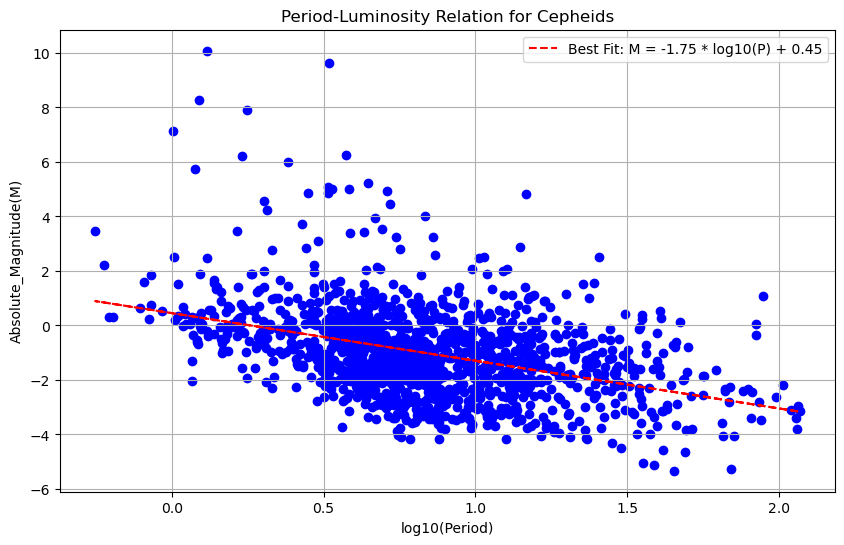

Alpha (α): -1.7501625568866077
Beta (β): 0.4529616510303395


In [77]:
# your code here
# Get the scatter plot of M and log_10(P) and the best fit line
# Get the values of alpha and beta

# 𝑀=𝛼log10(𝑃(in days))+𝛽

#Mv = m - 2.5 log[ (d/10)2 ]. 
# d = 1000/paralax in pc
gaia_data['M'] = gaia_data['mean apparent magnitude'] - 2.5 * np.log10((100/gaia_data['parallax'])** 2)
# Compute log10(P)
gaia_data['log10_P'] = np.log10(gaia_data['time period'])

# Plot the Period-Luminosity relation
plt.figure(figsize=(10, 6))
plt.scatter(gaia_data['log10_P'],gaia_data['M'],color='blue')
plt.title('Period-Luminosity Relation for Cepheids')
plt.xlabel('log10(Period)')
plt.ylabel('Absolute_Magnitude(M)')
plt.grid(True)

# Performing linear fit 
coefficients = np.polyfit(gaia_data['log10_P'], gaia_data['M'], 1)
alpha, beta = coefficients[0], coefficients[1]

# Plot
plt.plot(gaia_data['log10_P'], alpha * gaia_data['log10_P'] + beta, color='red', linestyle='--', label=f'Best Fit: M = {alpha:.2f} * log10(P) + {beta:.2f}')
plt.legend()

plt.show()

print(f"Alpha (α): {alpha}")
print(f"Beta (β): {beta}")


***
### Some useful information about the Magnitude system

The brightness of a star as seen by some observer is dependent on the observer's distance from the star as well as the intrinsic brightness of the star (ignoring any absorption in the intervening space).

In astronomy, brightness of a star, as seen by some observer, is measured in terms of its **apparent magnitude ($m$)**. For two stars (1 and 2) with fluxes $f_1$ and $f_2$ respectively, their apparent magnitudes $m_1$ and $m_2$ are related by:

$m_1 - m_2 = 2.5 \log_{10} \left( \frac{f_1}{f_2} \right)$

**Absolute magnitude ($M$)** of any star is its apparent magnitude if the star was exactly 10 parsecs away from the observer. Thus, $M$ only depends on the intrinsic brightness of the star.

***


-1.7501625568866077

In [4]:
beta

0.4529616510303395

# Section 3: Getting the distances to our galaxies

Now that we have our period-luminosity relation, we can observe cepheids in the galaxies in our cluster and use this to get the distances to our galaxies. (Yes, this is possible! Hubble Telescope actually observed Cepheids in the galaxies in Virgo Cluster)


For this, you have been given the data file 'cepheid.csv' which contains the following data fields:
*   Unique ID of the Cepheid
*   Name of the Galaxy to which it belongs
*   Mean Apparent Magnitude (m)
*   Time Period of Pulsation (in days)

In [78]:
#your code here
cepheid_data = pd.read_csv('cepheid.csv')

#cepheid_data['Distance(pc)'] = 10*( ( 10**( (cepheid_data['Apparent Magnitude'] - alpha*np.log10(cepheid_data['Period']) - beta)/2.5 ) )**(1/2) ) 
cepheid_data['Distance(pc)'] = 10**((cepheid_data['Apparent Magnitude'] -(alpha*np.log10(cepheid_data['Period']) - beta) +5)/5)

cepheid_data

,Cepheid ID,Galaxy_ID,Period,Apparent Magnitude,Distance(pc)
0,XYZ688132,NGC4436,56.209508,4.395283,3.820667e+02
1,XYZ819204,NGC4379,5.726730,30.222261,2.513833e+07
2,XYZ589831,PGC039619,8.130369,30.060146,2.637483e+07
3,XYZ327693,PGC043108,3.615739,30.326899,2.245739e+07
4,XYZ688142,NGC4621,5.612137,30.468379,2.795680e+07
...,...,...,...,...,...
4995,XYZ940768,AGC229053,9.764424,29.676074,2.356219e+07
4996,XYZ383719,IC3413,5.589813,30.091243,2.346682e+07
4997,XYZ219884,PGC042566,4.673219,30.360597,2.495164e+07
4998,XYZ416499,AGC227975,8.642655,30.087274,2.728376e+07


Use the Period-Luminosity Law derived in Section-2 and the above data to find an estimate for the distance to each galaxy in the cluster.

Make sure to handle outliers in the above data. The data may contain some cepheids that actually DO NOT belong to the given galaxy, but it just seems to us that this is the case since they fall along the same line of sight.
***

# Section 4: Getting the Hubble's Constant

The famous [Hubble's Law](https://en.wikipedia.org/wiki/Hubble%27s_law) is the observation that galaxies are moving away from Earth at speeds proportional to their distance.

$v = H_0 d$

where $H_0$ is the proportionalaity constant, also known as the Hubble's Constant.

Now that we have an estimate for the radial velocities and distance to the galaxies in our cluster, we need to find an estimate of the Hubble Constant (H).

Fit gaussians on your velocity and distance data and report the mean and standard deviation of the same. Also plot the histograms and the fitted gaussian.

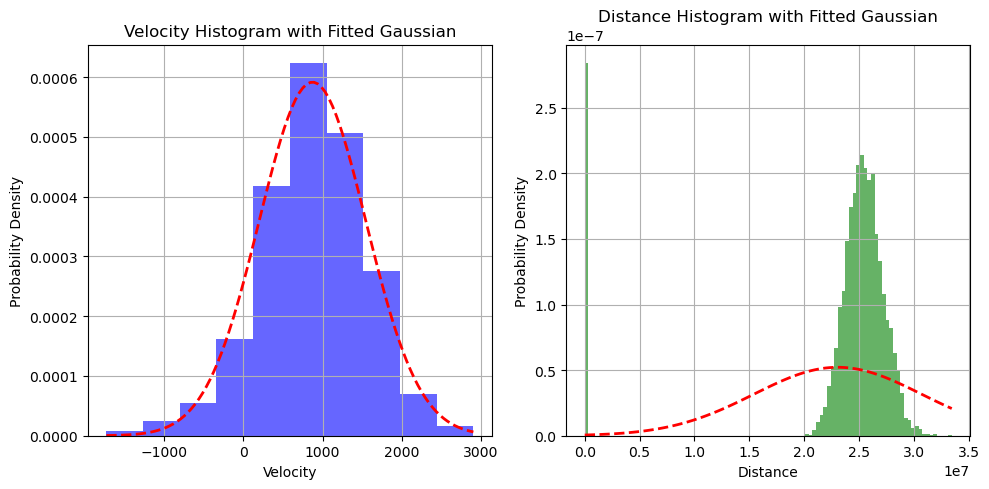

Velocity Gaussian - Mean: 873.4850359058477  Standard Deviation: 674.5831166651259
Distance Gaussian - Mean: 23059322.626809604  Standard Deviation: 7648004.038659425


In [85]:
# your code here

from scipy.stats import norm
from scipy.optimize import curve_fit

velocity_data = galaxy_data['Velocity(km/sec)']  # Example velocity data


#cepheid_data = cepheid_data[cepheid_data['Distance(pc)'] > 10**5]

distance_data = cepheid_data['Distance(pc)']        # Example distance data


# Fit Gaussian to velocity data
velocity_mean, velocity_std = norm.fit(velocity_data)
velocity_x = np.linspace(min(velocity_data), max(velocity_data), 100)
velocity_pdf = norm.pdf(velocity_x, velocity_mean, velocity_std)

# Fit Gaussian to distance data
dist_mean, dist_std = norm.fit(distance_data)
dist_x = np.linspace(min(distance_data), max(distance_data), 100)
dist_pdf = norm.pdf(dist_x, dist_mean, dist_std)

# Plot histograms and fitted Gaussians
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(velocity_data, bins=10, density=True, alpha=0.6, color='b')
plt.plot(velocity_x, velocity_pdf, 'r--', linewidth=2)
plt.title('Velocity Histogram with Fitted Gaussian')
plt.xlabel('Velocity')
plt.ylabel('Probability Density')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(distance_data, bins=100, density=True, alpha=0.6, color='g')
plt.plot(dist_x, dist_pdf, 'r--', linewidth=2)
plt.title('Distance Histogram with Fitted Gaussian')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.grid(True)

plt.tight_layout()
plt.show()

# mean and standard deviation of the fitted Gaussians
print("Velocity Gaussian - Mean:", velocity_mean, " Standard Deviation:", velocity_std)
print("Distance Gaussian - Mean:", dist_mean, " Standard Deviation:", dist_std)



Using the values obtained in the previous part, report your value of $H$ along with the error margins.

In [87]:
# your code here
Hubble = vel_std/(dist_std/10**6)
print("Hubble const",Hubble,'km/s/Mpc')

Hubble const 88.2038128190332 km/s/Mpc


***

#### Q4.1 Compare the value of $H$ that you got from the standard $H_0$ commonly accepted today. The estimate that you got - is it the same (within error margins), higher or lower than the value of $H_0$.

\< 73.8 km/s/Mpc is the accepted value and my answer is within 20% of the commonly accepted value \>

***

#### Q4.2 What might be the reason behind this difference in values

\< Well, there is multiple data of a single galaxy in the cepheid.csv file and the  that is giving some in accurate values of distance in the subsequent calculation\>

***

# Section 5 : Dark Matter

Dark matter is a component of the universe whose presence is discerned from its gravitational attraction rather than its luminosity.

***

#### Q5.1 ESTIMATE the total mass of the Galaxy Cluster. This includes mass due to visible matter as well as dark matter.

HINT: The [Virial Theorem](https://phys.libretexts.org/Bookshelves/Classical_Mechanics/Variational_Principles_in_Classical_Mechanics_%28Cline%29/02%3A_Review_of_Newtonian_Mechanics/2.11%3A_Virial_Theorem) provides a general equation that relates the average over time of the total kinetic energy of a stable system of discrete particles, bound by a conservative force
 $$ \left<KE\right> = -\frac{1}{2} \left<PE\right> $$

\< Your Answer here \>


In [83]:
# from the gaussian plot of velocity, we can understand that the cluster as a hole is moving with approximatels 1000 km/sec
# away from us and the velocity of the galaxys of the cluster have a tangential velovity of 2000km/s.

# That's why the net velocity towards us is -1000km/s (of the orbitting galaxys) and mean is 1000km/s (attributing to the velocity
# component away from us due to expansion of the universe) and 3000km/s of the recceding galaxys(in orbit pointing away from us)

# BY making some approximation of distance over the 10 degree radius(in dec degree) not affecting the distance between us and 
# all the galaxys of the cluster and by looking at the histogram of the distance, I conclude that the Radius of cluseter is
# roughly 0.5*(10**7) pc, or 


In [84]:
# your code here
# v = 2000 km/s
# r = 0.5*(10**7) pc , 1pc = 3.086*(10**16) meter
G = 6.67408*(10**11)  # m^3 kg^-1 s^-2
v = 2000000 #m/s
r = 3.086*0.5*(10**23) #m

mass = r*(v**2)/G
mass

9.247716539208399e+23


***

#### Q5.2 ESTIMATE the visible mass in the galaxy cluster. Use the Mass - Luminosity Relation for Main-Sequence Stars, assuming that it holds well for galaxies too. You may use the Milky Way as a reference.

Absolute Magnitude of Milky Way $ \approx -21 mag$

Visible mass of Milky Way $\approx 2 \times 10 ^ {11} M_{sun}$

\< Your answer here \>

In [12]:
# your code here

***

#### Q5.3 What is the fraction of the total mass of the galaxy cluster that is actually in the form of Dark Matter

\< Your answer here \>

***